## Import pandas

In [1]:
import pandas as pd

## read data yang diperlukan

Data didapat dari website : https://www.asrock.com/mb/AMD/B550M%20Pro4/index.asp#MemoryRN dengan cleaning tidak terlalu bersih pada bagian dimm. Kalau value salah satu ram pada kolom dimm berbentuk tanggal, artinya bernilai bulan/hari. contoh :2021-02-04 00:00:00 artinya 2/4. 

In [11]:
matisse = pd.read_excel("pro4_ms.xlsx")
renoir  = pd.read_excel("pro4_rn.xlsx")
cezanne = pd.read_excel("pro4_cz.xlsx")
vermeer = pd.read_excel("pro4_vm.xlsx")


In [31]:
a = vermeer["vendor"].value_counts()
a

HyperX         43
Corsair        17
Crucial        13
Kingston       12
ThermalTake    12
G.Skill         9
Team            7
ADATA           6
Samsung         5
Patriot         2
KLEVV           2
Geil            1
Panram          1
BALLISTIX       1
Name: vendor, dtype: int64

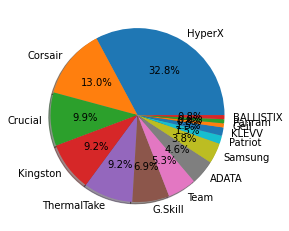

<Figure size 40000x40000 with 0 Axes>

In [32]:
plt.pie(a,labels=a.keys(), autopct='%1.1f%%' ,shadow=True)
plt.figure(figsize=(100, 100), dpi=400)
plt.show()

In [33]:
a = cezanne["vendor"].value_counts()
a

HyperX         23
Crucial         4
G.Skill         3
Corsair         3
GALAX           1
KLEVV           1
ThermalTake     1
Name: vendor, dtype: int64

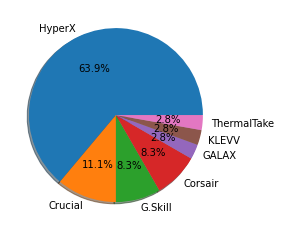

<Figure size 40000x40000 with 0 Axes>

In [34]:
plt.pie(a,labels=a.keys(), autopct='%1.1f%%' ,shadow=True)
plt.figure(figsize=(100, 100), dpi=400)
plt.show()

In [35]:
a = matisse["vendor"].value_counts()
a

HyperX         43
Corsair        17
Crucial        13
Kingston       12
ThermalTake    12
G.Skill         9
Team            7
ADATA           6
Samsung         5
KLEVV           2
Geil            1
Panram          1
BALLISTIX       1
Name: vendor, dtype: int64

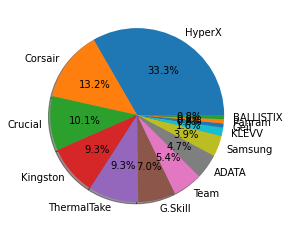

<Figure size 40000x40000 with 0 Axes>

In [36]:
plt.pie(a,labels=a.keys(), autopct='%1.1f%%' ,shadow=True)
plt.figure(figsize=(100, 100), dpi=400)
plt.show()

## Mencari jenis RAM yang support untuk Series Matisse dan Renoir

In [6]:
supported_ram = pd.merge(matisse,renoir, how = "inner")
supported_ram

,Type,vendor,ram speed,supported speed,size,module,chip,ss/ds,dimm,oc
0,DDR4,G.Skill,4000,4000,8GB,F4-4000C18Q-32GTRS,Hynix,SS,2,v
1,DDR4,ThermalTake,4400,4400,8GB,RA24D408GX2-4400C19A,Hynix,SS,2,v
2,DDR4,ThermalTake,4000,4000,8GB,RA24D408GX2-4000C19A,Hynix,SS,2,v
3,DDR4,ThermalTake,3600,3600,8GB,R010D408GX2-3600C18A,Hynix,SS,2,v
4,DDR4,ThermalTake,3600,3600,8GB,RA24D408GX2-3600C18A,Hynix,SS,2,v
...,...,...,...,...,...,...,...,...,...,...
121,DDR4,HyperX,3333,3333,16GB,HX433C16PB3/16,anon,DS,"""2/4""",v
122,DDR4,KLEVV,3466,3466,8GB,KD48GU880-34A170X,anon,SS,"""2/4""",v
123,DDR4,Team,3600,3600,16GB,TCD416G3600C18JBK,anon,DS,"""2/4""",v
124,DDR4,Crucial,3200,3200,16GB,CT16G4DFD832A.16FJ1,anon,DS,"""2/4""",x


In [7]:
print(len(renoir))
print(len(matisse))

130
129


dapat dilihat bahwa ada 126 RAM yang jenisnya sama dan support pada CPU AMD Matisse dan Renoir pada motherboard asrock b550m pro4. Jika cukup, data dapat disimpan menjadi file format excel kembali.

In [8]:
supported_ram.to_excel("supported_ram.xlsx")

## Mencari RAM dengan spec yang diinginkan

selesai memilih ram yang support, rasanya masih sulit untuk mencari ram yang diinginkan, seperti : kapasitas, speed, oc, dll. Kita dapat menggunakan fungsi loc untuk mencari ram dengan spec yang diinginkan dengan conditional statment.

Misal, kita ingin mencari ram yang memiliki speed lebih dari 3000Mhz, maka kita menuliskan : supported_ram.loc[supported_ram["ram speed"]>3000]

In [9]:
supported_ram.loc[supported_ram["ram speed"]>3000]

,Type,vendor,ram speed,supported speed,size,module,chip,ss/ds,dimm,oc
0,DDR4,G.Skill,4000,4000,8GB,F4-4000C18Q-32GTRS,Hynix,SS,2,v
1,DDR4,ThermalTake,4400,4400,8GB,RA24D408GX2-4400C19A,Hynix,SS,2,v
2,DDR4,ThermalTake,4000,4000,8GB,RA24D408GX2-4000C19A,Hynix,SS,2,v
3,DDR4,ThermalTake,3600,3600,8GB,R010D408GX2-3600C18A,Hynix,SS,2,v
4,DDR4,ThermalTake,3600,3600,8GB,RA24D408GX2-3600C18A,Hynix,SS,2,v
...,...,...,...,...,...,...,...,...,...,...
120,DDR4,HyperX,3333,3333,16GB,HX433C16PB3K4/64,anon,DS,"""2/4""",v
121,DDR4,HyperX,3333,3333,16GB,HX433C16PB3/16,anon,DS,"""2/4""",v
122,DDR4,KLEVV,3466,3466,8GB,KD48GU880-34A170X,anon,SS,"""2/4""",v
123,DDR4,Team,3600,3600,16GB,TCD416G3600C18JBK,anon,DS,"""2/4""",v


Misalkan kita tidak hanya mencari ram dengan kecepatan lebih dari 3000Mhz, tetapi ram dengan merk yang kita percaya. Misalkan kita mencari ram dengan merk ADATA, maka kita akan menambah conditional statement pada loc. Contoh:

supported_ram.loc[(supported_ram["ram speed"]>3000) & (supported_ram["vendor"]="ADATA")]

In [32]:
supported_ram.loc[(supported_ram["ram speed"]>3200) & (supported_ram["vendor"]=="HyperX")&(supported_ram["size"]=="8GB")]

,Type,vendor,ram speed,supported speed,size,module,chip,ss/ds,dimm,oc
15,DDR4,HyperX,3600,3600,8GB,HX436C17PB4/8,Hynix C,SS,2,v
25,DDR4,HyperX,4000,4000,8GB,HX440C19PB4AK2/16,Hynix D,SS,2,v
52,DDR4,HyperX,3466,3466,8GB,HX434C19FW2K2/16,Micron E-die,SS,"""2/4""",v
53,DDR4,HyperX,3466,3466,8GB,HX434C19FB2K2/16,Micron E-die,SS,"""2/4""",v
54,DDR4,HyperX,3466,3466,8GB,HX434C19FR2/8,Micron E-die,SS,"""2/4""",v
55,DDR4,HyperX,3466,3466,8GB,HX434C19FW2/8,Micron E-die,SS,"""2/4""",v
56,DDR4,HyperX,3466,3466,8GB,HX434C19FB2/8,Micron E-die,SS,"""2/4""",v
78,DDR4,HyperX,4266,4266,8GB,HX442C19PB3K2/16,Samsung B-die,SS,2,v
79,DDR4,HyperX,4133,4133,8GB,HX441C19PB3/8,Samsung B-die,SS,2,v
80,DDR4,HyperX,4133,4133,8GB,HX441C19PB3K2/16,Samsung B-die,SS,2,v


In [19]:
supported_ram = pd.read_excel("supported_ram.xlsx")

## proporsi vendor RAM 

In [27]:
prop_sup_ram = (supported_ram["vendor"].value_counts())
prop_sup_ram

HyperX         42
Corsair        15
Crucial        13
Kingston       12
ThermalTake    12
G.Skill         9
Team            7
ADATA           6
Samsung         5
KLEVV           2
Geil            1
Panram          1
BALLISTIX       1
Name: vendor, dtype: int64

In [25]:
import matplotlib.pyplot as plt

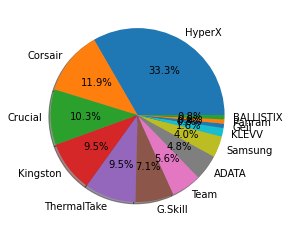

<Figure size 40000x40000 with 0 Axes>

In [28]:
plt.pie(prop_sup_ram,labels=prop_sup_ram.keys(), autopct='%1.1f%%' ,shadow=True)
plt.figure(figsize=(100, 100), dpi=400)
plt.show()

## Kasus 1 : 

Saya ingin membeli processor jenis Ryzen 5 5600G(Cezanne). Dalam beberapa bulan ke depan, saya ingin mengupgradenya menjadi Ryzen 7 3800X(Matisse) atau Ryzen 7 5800X(Vermeer) dengan GPU. Jadi saya ingin memilih RAM berkapasitas 8GB yang support di ketiga Processor itu agar tidak perlu membeli RAM lagi nanti.

Jadi, Objektif kita adalah RAM yang support berjalan di Cezanne, Matisse, Vermeer dengan kapasitas "8GB"

## 1. Buat data inner 

In [10]:
supp_ram1 = pd.merge(cezanne,matisse, how = "inner")

In [11]:
supp_ram2 = pd.merge(supp_ram1, vermeer, how = "inner")

In [12]:
supp_ram2

,Type,vendor,ram speed,supported speed,size,module,chip,ss/ds,dimm,oc
0,DDR4,G.Skill,4000,4000,8GB,F4-4000C18Q-32GTRS,Hynix,SS,2,v
1,DDR4,ThermalTake,4000,4000,8GB,RA24D408GX2-4000C19A,Hynix,SS,2,v
2,DDR4,HyperX,3600,3600,16GB,HX436C17PB3K4/64,Hynix C,DS,2,v
3,DDR4,HyperX,3600,3600,16GB,HX436C17PB3/16,Hynix C,DS,2,v
4,DDR4,HyperX,3600,3600,16GB,HX436C17PB3K2/32,Hynix C,DS,2,v
5,DDR4,Crucial,4000,4000,8GB,BLE8G4D40BEEAK.M8FE1,Micron,SS,2,v
6,DDR4,HyperX,3600,3600,16GB,HX436C17PB3AK4/64,Micron J-die,DS,2,v
7,DDR4,HyperX,4000,4000,8GB,HX440C19PB3/8,Samsung B-die,SS,2,v
8,DDR4,HyperX,4000,4000,8GB,HX440C19PB3K2/16,Samsung B-die,SS,2,v
9,DDR4,HyperX,4000,4000,8GB,HX440C19PB3A/8,Samsung B-die,SS,2,v


## 2. Proporsi dan Pie Chart

In [27]:
prop_sup_ram = supp_ram2["vendor"].value_counts()
prop_sup_ram

HyperX         8
Corsair        1
G.Skill        1
ThermalTake    1
Crucial        1
Name: vendor, dtype: int64

In [28]:
import matplotlib.pyplot as plt

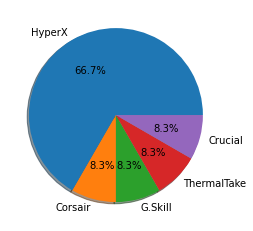

<Figure size 40000x40000 with 0 Axes>

In [29]:
plt.pie(prop_sup_ram,labels=prop_sup_ram.keys(), autopct='%1.1f%%' ,shadow=True)
plt.figure(figsize=(100, 100), dpi=400)
plt.show()

Dari data di atas, vendor HyperX memiliki banyak pilihan yang mendukung ketiga jenis processor.

## 3. Menyeleksi RAM yang mempunyai kapasitas 8 GB

In [33]:
supp_ram2.loc[(supp_ram2["size"]=="8GB")]

,Type,vendor,ram speed,supported speed,size,module,chip,ss/ds,dimm,oc
0,DDR4,G.Skill,4000,4000,8GB,F4-4000C18Q-32GTRS,Hynix,SS,2,v
1,DDR4,ThermalTake,4000,4000,8GB,RA24D408GX2-4000C19A,Hynix,SS,2,v
5,DDR4,Crucial,4000,4000,8GB,BLE8G4D40BEEAK.M8FE1,Micron,SS,2,v
7,DDR4,HyperX,4000,4000,8GB,HX440C19PB3/8,Samsung B-die,SS,2,v
8,DDR4,HyperX,4000,4000,8GB,HX440C19PB3K2/16,Samsung B-die,SS,2,v
9,DDR4,HyperX,4000,4000,8GB,HX440C19PB3A/8,Samsung B-die,SS,2,v
10,DDR4,HyperX,4000,4000,8GB,HX440C19PB3AK2/16,Samsung B-die,SS,2,v
11,DDR4,Corsair,4000,4000,8GB,CMW32GX4M4Z4000C18 ver3.31,anon,SS,2,v


Dari hasil seleksi, ada 5 vendor RAM yang bisa saya pilih yaitu G.Skill, ThermalTake, Crucial, HyperX, dan Corsair. HyperX memiliki pilihan lebih banyak dari merk lain. Seluruh kecepatan ram yang support ketiga processor sebesar 4000Mhz. Memilih Ram 4000Mhz Tentu akan jadi pilihan yang sulit untuk pembeli. Alasannya, RAM dengan speed tersebut lebih mahal dari speed di bawahnya dan 4000Mhz masih jarang digunakan. 

Mungkin kita juga pernah memakai RAM yang tidak terdaftar tetapi tetap bisa berjalan baik di motherboard. Tetapi ketika RAM tidak berfungsi, kita tidak bisa menyimpulkan motherboard bermasalah. berbeda ketika RAM yang dipakai telah terdaftar mensupport motherboard dan processor tetapi tetap tidak berfungsi, maka ada indikasi motherboard bermasalah, Sehingga kita dapat mengklaim garansi.

## Kasus 2 :
Saya mau mengetahui jenis RAM apa saja yang support untuk berbagai jenis processor. Dari sini saya bisa tau ram mana yang diprediksi masih bisa digunakan jika jenis processor baru keluar.

## 1. Seleksi RAM

In [37]:
inner1 = pd.merge(cezanne,matisse,how = "inner")
inner2 = pd.merge(renoir, vermeer, how = "inner")

support_ram = pd.merge(inner1,inner2, how = "inner")

In [38]:
support_ram

,Type,vendor,ram speed,supported speed,size,module,chip,ss/ds,dimm,oc
0,DDR4,G.Skill,4000,4000,8GB,F4-4000C18Q-32GTRS,Hynix,SS,2,v
1,DDR4,ThermalTake,4000,4000,8GB,RA24D408GX2-4000C19A,Hynix,SS,2,v
2,DDR4,HyperX,3600,3600,16GB,HX436C17PB3K4/64,Hynix C,DS,2,v
3,DDR4,HyperX,3600,3600,16GB,HX436C17PB3/16,Hynix C,DS,2,v
4,DDR4,HyperX,3600,3600,16GB,HX436C17PB3K2/32,Hynix C,DS,2,v
5,DDR4,Crucial,4000,4000,8GB,BLE8G4D40BEEAK.M8FE1,Micron,SS,2,v
6,DDR4,HyperX,3600,3600,16GB,HX436C17PB3AK4/64,Micron J-die,DS,2,v
7,DDR4,HyperX,4000,4000,8GB,HX440C19PB3/8,Samsung B-die,SS,2,v
8,DDR4,HyperX,4000,4000,8GB,HX440C19PB3K2/16,Samsung B-die,SS,2,v
9,DDR4,HyperX,4000,4000,8GB,HX440C19PB3A/8,Samsung B-die,SS,2,v


In [44]:
support_ram.loc[support_ram["ram speed"]<4000]

,Type,vendor,ram speed,supported speed,size,module,chip,ss/ds,dimm,oc
2,DDR4,HyperX,3600,3600,16GB,HX436C17PB3K4/64,Hynix C,DS,2,v
3,DDR4,HyperX,3600,3600,16GB,HX436C17PB3/16,Hynix C,DS,2,v
4,DDR4,HyperX,3600,3600,16GB,HX436C17PB3K2/32,Hynix C,DS,2,v
6,DDR4,HyperX,3600,3600,16GB,HX436C17PB3AK4/64,Micron J-die,DS,2,v


In [46]:
support_ram.loc[support_ram["ram speed"]>=4000]

,Type,vendor,ram speed,supported speed,size,module,chip,ss/ds,dimm,oc
0,DDR4,G.Skill,4000,4000,8GB,F4-4000C18Q-32GTRS,Hynix,SS,2,v
1,DDR4,ThermalTake,4000,4000,8GB,RA24D408GX2-4000C19A,Hynix,SS,2,v
5,DDR4,Crucial,4000,4000,8GB,BLE8G4D40BEEAK.M8FE1,Micron,SS,2,v
7,DDR4,HyperX,4000,4000,8GB,HX440C19PB3/8,Samsung B-die,SS,2,v
8,DDR4,HyperX,4000,4000,8GB,HX440C19PB3K2/16,Samsung B-die,SS,2,v
9,DDR4,HyperX,4000,4000,8GB,HX440C19PB3A/8,Samsung B-die,SS,2,v
10,DDR4,HyperX,4000,4000,8GB,HX440C19PB3AK2/16,Samsung B-die,SS,2,v
11,DDR4,Corsair,4000,4000,8GB,CMW32GX4M4Z4000C18 ver3.31,anon,SS,2,v


## Kasus 3:

In [15]:
support_ram3 = pd.merge(renoir,vermeer,how="inner")

In [16]:
support_ram3

,Type,vendor,ram speed,supported speed,size,module,chip,ss/ds,dimm,oc
0,DDR4,G.Skill,4000,4000,8GB,F4-4000C18Q-32GTRS,Hynix,SS,2,v
1,DDR4,ThermalTake,4400,4400,8GB,RA24D408GX2-4400C19A,Hynix,SS,2,v
2,DDR4,ThermalTake,4000,4000,8GB,RA24D408GX2-4000C19A,Hynix,SS,2,v
3,DDR4,ThermalTake,3600,3600,8GB,R010D408GX2-3600C18A,Hynix,SS,2,v
4,DDR4,ThermalTake,3600,3600,8GB,RA24D408GX2-3600C18A,Hynix,SS,2,v
...,...,...,...,...,...,...,...,...,...,...
121,DDR4,G.Skill,3000,3000,8GB,F4-3000C16Q-32GTZN,Hynix,SS,"""2/4""",x
122,DDR4,ThermalTake,3200,3200,8GB,RA24D408GX2-3200C16A,Hynix,SS,"""2/4""",x
123,DDR4,ThermalTake,3200,3200,8GB,R010D408GX2-3200C16A,Hynix,SS,"""2/4""",x
124,DDR4,Panram,3200,3200,16GB,W4U3200PS-16G,Hynix A-die,DS,"""2/4""",x


In [18]:
support_ram3.loc[support_ram3["ram speed"]<3800]

,Type,vendor,ram speed,supported speed,size,module,chip,ss/ds,dimm,oc
3,DDR4,ThermalTake,3600,3600,8GB,R010D408GX2-3600C18A,Hynix,SS,2,v
4,DDR4,ThermalTake,3600,3600,8GB,RA24D408GX2-3600C18A,Hynix,SS,2,v
5,DDR4,ThermalTake,3200,3200,32GB,R009R432GX2-3200C16A,Hynix,DS,2,x
6,DDR4,ThermalTake,3200,3200,32GB,R022R432GX2-3200C16A,Hynix,DS,2,x
7,DDR4,ThermalTake,3200,3200,16GB,R022D416GX2-3200C16A,Hynix,SS,2,x
...,...,...,...,...,...,...,...,...,...,...
121,DDR4,G.Skill,3000,3000,8GB,F4-3000C16Q-32GTZN,Hynix,SS,"""2/4""",x
122,DDR4,ThermalTake,3200,3200,8GB,RA24D408GX2-3200C16A,Hynix,SS,"""2/4""",x
123,DDR4,ThermalTake,3200,3200,8GB,R010D408GX2-3200C16A,Hynix,SS,"""2/4""",x
124,DDR4,Panram,3200,3200,16GB,W4U3200PS-16G,Hynix A-die,DS,"""2/4""",x


In [14]:
cezanne.loc[(cezanne["ram speed"]<4000) & (cezanne["size"]=="8GB")]

,Type,vendor,ram speed,supported speed,size,module,chip,ss/ds,dimm,oc
2,DDR4,HyperX,3600,3600,8GB,HX436C17PB4/8,Hynix C,SS,"""2/4""",v
3,DDR4,HyperX,3600,3600,8GB,HX436C17PB4AK2/16,Hynix C,SS,"""2/4""",v
18,DDR4,G.Skill,3600,3600,8GB,F4-3600C16Q-32GTZN,Samsung B-die,SS,2,v
26,DDR4,Corsair,3600,3600,8GB,CMK32GX4M4D3600C18 ver 3.31,Spectek Z11B,SS,2,v
29,DDR4,Crucial,3600,3600,8GB,BL8G36C16U4BL.M8FE1,anon,SS,"""2/4""",v
30,DDR4,Crucial,3600,3600,8GB,BLE8G4D36BEEAK.M8FE1,anon,SS,2,v
31,DDR4,Crucial,3600,3600,8GB,BL8G36C16U4B.M8FE1,anon,SS,"""2/4""",v
32,DDR4,G.Skill,3600,3600,8GB,F4-3600C16D-16GTRG,anon,SS,"""2/4""",v
34,DDR4,HyperX,3600,3600,8GB,HX436C17PB4A/8,anon,SS,"""2/4""",v
35,DDR4,HyperX,3600,3600,8GB,HX436C17PB4AK4/32,anon,SS,"""2/4""",v
